
## Features:

#### InvoiceNo

#### StockCode

#### Description

#### Quantity

#### InvoiceDate

#### UnitPrice

#### CustomerID

#### Country 

### Objective :
##### To do RFM analysis on data and apply cluster algorithms

1. Importing Liberaries
2. reading file in python
3. checking shape and first 5 rows 
4. by considering country checking number of unique customer id in data
5. Filtering United Kingdom data for analysis
6. Checking null values and removing null values in cutomer id column
7. checking negative values in quantity and unit price columns and filtering that
8. converting invoice date column format to date time format
9. adding total amount column in data frame
10. Checking last date of transection and adding a new data frame which contains Customer id,Recency,Frequency and Monetary columns.
11. Replacine 0 and negative values in frequency and monetary with 1
12. checking normalize distribution of columns Recency, Frequency and Monetary.
13. Normalizing data using standar scalar
14. apllying kmean, meanshift, Hierarchical Agglomerative Clustering, Db scan, Gaussian mixture, Affinity propagation and back appliyng cluster labels to data 
15. taking mean of each clustered label columns for each algorithm and checking how well algorithm created clusters


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [123]:
Dt=pd.read_csv('OnlineRetail.csv', encoding = 'unicode_escape')

In [124]:
Dt.shape

(541909, 8)

In [125]:
Dt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-10 8:26,3.39,17850.0,United Kingdom


In [126]:
Dt1=Dt[['Country','CustomerID']].drop_duplicates()
Dt1.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)


,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


In [127]:
Dt = Dt.query("Country=='United Kingdom'").reset_index(drop=True)

In [128]:
Dt.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [129]:
Dt=Dt[pd.notnull(Dt['CustomerID'])]

In [130]:
Dt.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [131]:
Dt.shape

(361878, 8)

In [132]:
Dt.Quantity.min()

-80995

In [133]:
Dt.UnitPrice.min()

0.0

In [134]:
Dt = Dt[(Dt['Quantity']>0)]


In [135]:
Dt['InvoiceDate'] = pd.to_datetime(Dt['InvoiceDate'])

In [136]:
Dt['TotalAmount'] = Dt['Quantity'] * Dt['UnitPrice']

In [137]:
Dt.shape

(354345, 9)

In [138]:
Dt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [139]:
import datetime as dt

In [140]:
Dt.InvoiceDate.max()

Timestamp('2011-12-09 12:49:00')

In [141]:
Latest_Date = dt.datetime(2011,12,10)
Dtrfm = Dt.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})


In [142]:
Dtrfm['InvoiceDate'] = Dtrfm['InvoiceDate'].astype(int)

In [143]:
Dtrfm.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)


In [144]:
Dtrfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [157]:
Dtrfm.shape

(3921, 3)

In [145]:
Dtrfm.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4596,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


In [147]:
def handle0nneg(num):
    if num <= 0:
        return 1
    else:
        return num
Dtrfm['Recency'] = [handle0nneg(x) for x in Dtrfm.Recency]
Dtrfm['Monetary'] = [handle0nneg(x) for x in Dtrfm.Monetary]


In [148]:
dt= Dtrfm[['Recency', 'Frequency', 'Monetary']].apply(np.log)

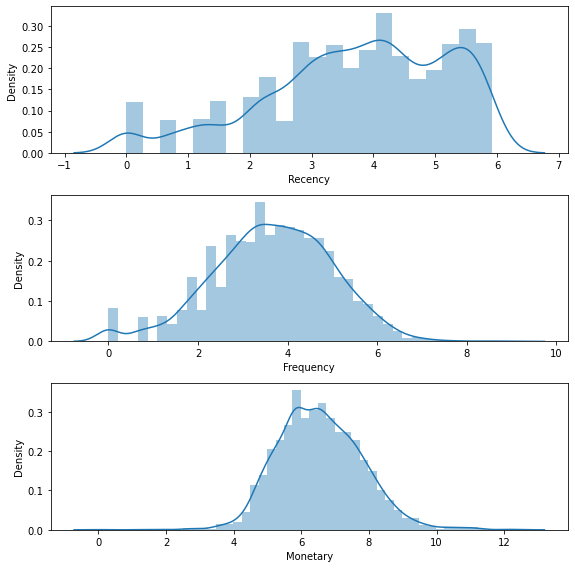

In [151]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
sns.distplot(dt["Recency"], ax=ax1)
sns.distplot(dt["Frequency"], ax=ax2)
sns.distplot(dt["Monetary"], ax=ax3)
plt.tight_layout()

In [152]:
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(dt)

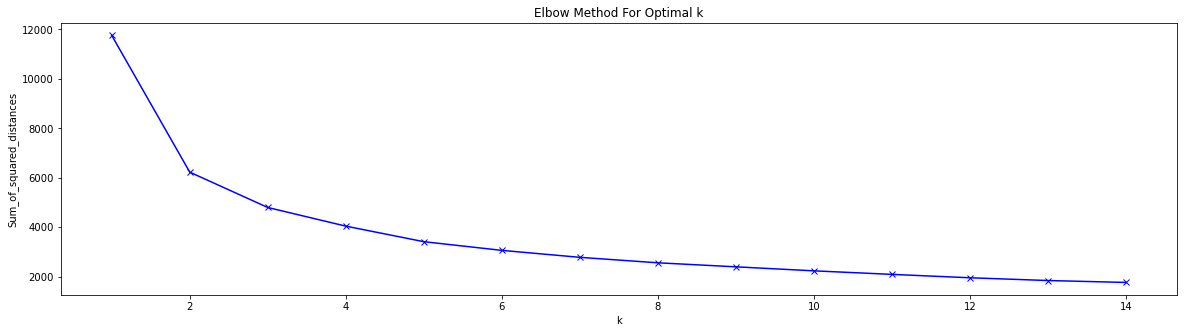

In [153]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []

K = range(1,15)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_scaled)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


K-Means


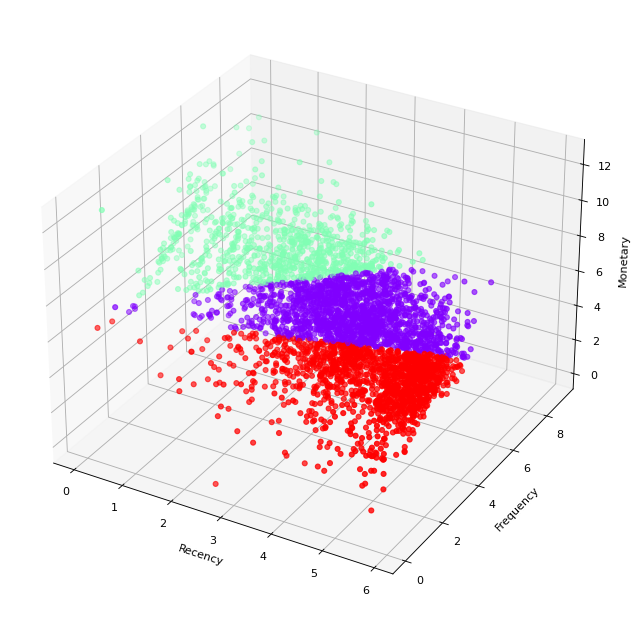

In [154]:
from mpl_toolkits.mplot3d import Axes3D

model = KMeans(n_clusters=3)
model.fit(cluster_scaled)
kmeans_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(dt['Recency'],dt['Frequency'],dt['Monetary'],
             c=kmeans_labels, cmap='rainbow')

xLabel = ax.set_xlabel('Recency', linespacing=3.2)
yLabel = ax.set_ylabel('Frequency', linespacing=3.1)
zLabel = ax.set_zlabel('Monetary', linespacing=3.4)
print("K-Means")

In [158]:
Dt_kmeans = Dtrfm.assign(Cluster=kmeans_labels) # back apply
grouped_kmeans = Dt_kmeans.groupby(['Cluster']).mean().round(1)
grouped_kmeans

,Recency,Frequency,Monetary
Cluster,,,
0,70.2,69.5,1187.1
1,11.0,257.3,5815.1
2,165.3,14.7,286.5


BW is 0.9828519857150216
number of estimated clusters : 11
Mean shift


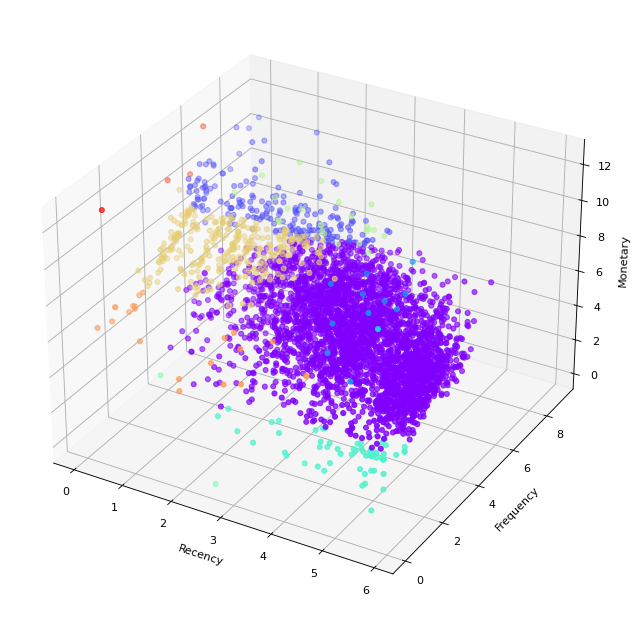

In [165]:
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

bandwidth=estimate_bandwidth(cluster_scaled, quantile=0.1)
print("BW is",bandwidth)

analyzer = MeanShift(bandwidth) 
analyzer.fit(cluster_scaled)
labels = analyzer.labels_


labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(dt['Recency'],dt['Frequency'],dt['Monetary'],
             c=labels, cmap='rainbow')

xLabel = ax.set_xlabel('Recency', linespacing=3.2)
yLabel = ax.set_ylabel('Frequency', linespacing=3.1)
zLabel = ax.set_zlabel('Monetary', linespacing=3.4)


# print the labels of each data 
print("number of estimated clusters : %d" % n_clusters_)
print("Mean shift")

In [166]:
Dt_meanshift = Dtrfm.assign(Cluster=analyzer.labels_) # back apply
grouped_meanshift = Dt_meanshift.groupby(['Cluster']).mean().round(1)
grouped_meanshift

,Recency,Frequency,Monetary
Cluster,,,
0,102.9,60.0,884.4
1,7.3,604.0,9886.9
2,120.3,30.3,13289.2
3,325.0,1.0,77183.6
4,208.0,1.5,48.3
5,8.5,2.0,21.5
6,20.2,256.1,34271.2
7,4.5,115.6,3322.1
8,11.5,5.4,719.4


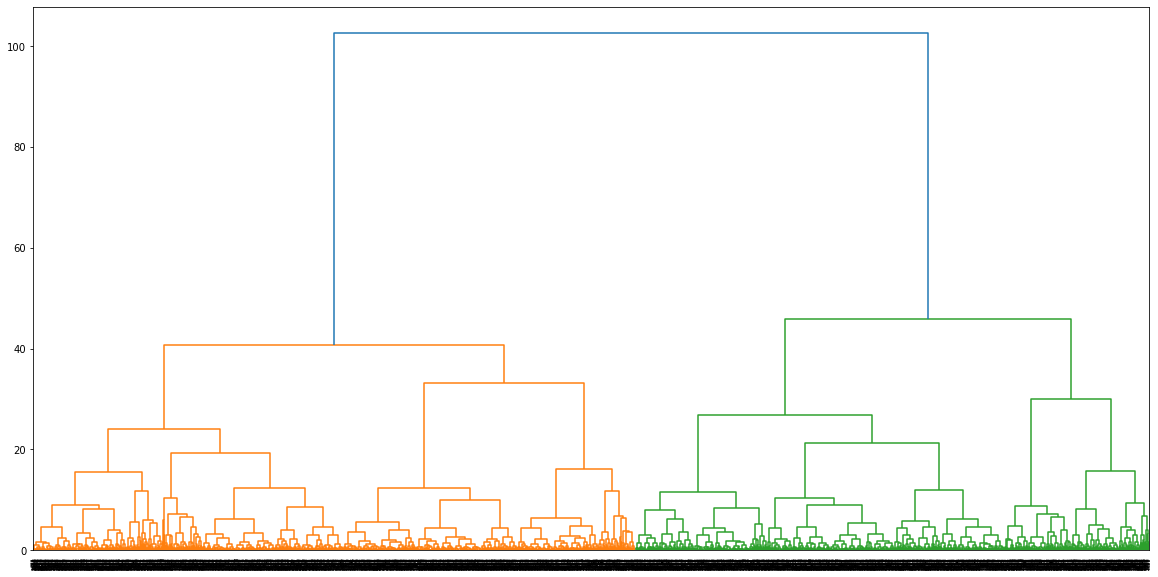

In [167]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(cluster_scaled, method='ward'))

Hierarchical Agglomerative Clustering


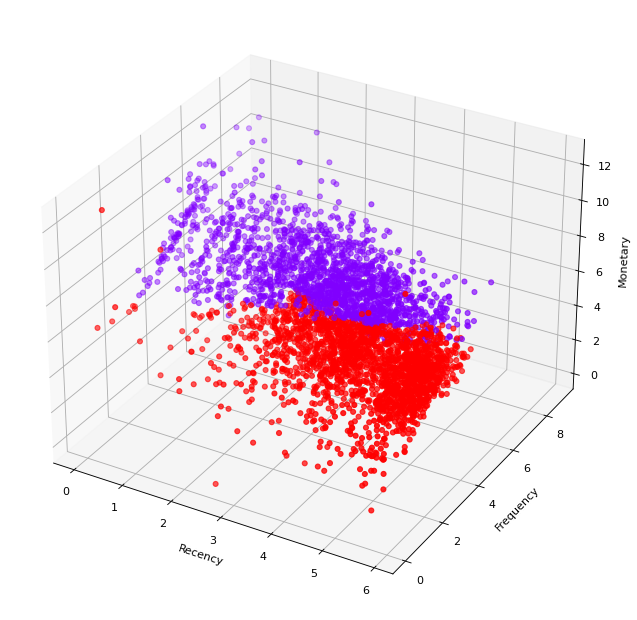

In [169]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=2)
model.fit(cluster_scaled)
hac_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(dt['Recency'],dt['Frequency'],dt['Monetary'],
             c=hac_labels, cmap='rainbow')

xLabel = ax.set_xlabel('Recency', linespacing=3.2)
yLabel = ax.set_ylabel('Frequency', linespacing=3.1)
zLabel = ax.set_zlabel('Monetary', linespacing=3.4)

print("Hierarchical Agglomerative Clustering")

In [178]:
Dt_hac = Dtrfm.assign(Cluster=hac_labels) # back apply
grouped_hac = Dt_hac.groupby(['Cluster']).mean().round(1)
grouped_hac

,Recency,Frequency,Monetary
Cluster,,,
0,38.7,170.1,3379.8
1,137.0,22.4,570.9


number of estimated clusters : 4


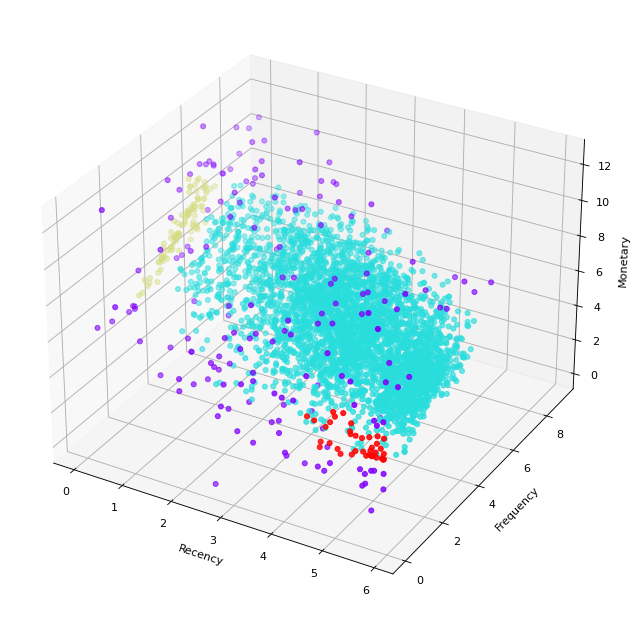

In [171]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.4, min_samples=6)
model.fit(cluster_scaled)
dbs_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(dt['Recency'],dt['Frequency'],dt['Monetary'],
             c=dbs_labels, cmap='rainbow')

xLabel = ax.set_xlabel('Recency', linespacing=3.2)
yLabel = ax.set_ylabel('Frequency', linespacing=3.1)
zLabel = ax.set_zlabel('Monetary', linespacing=3.4)


labels_unique = np.unique(dbs_labels)
n_clusters_ = len(labels_unique)
# print the labels of each data 
print("number of estimated clusters : %d" % n_clusters_)

In [179]:
Dt_dbs = Dtrfm.assign(Cluster=dbs_labels) # back apply
grouped_dbs = Dt_dbs.groupby(['Cluster']).mean().round(1)
grouped_dbs

,Recency,Frequency,Monetary
Cluster,,,
-1,66.4,302.6,14658.0
0,93.8,78.7,1230.6
1,1.0,191.2,3846.2
2,238.3,1.0,157.3


In [173]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
 
X_train = cluster_scaled


[[-0.0335354   0.23756746  0.10108305]
 [-0.93058869 -0.13317509  0.36146874]
 [ 1.17898714 -0.58770512 -0.73278042]]


[[[ 0.43464303 -0.23395516 -0.19175604]
  [-0.23395516  0.66150852  0.55616569]
  [-0.19175604  0.55616569  0.70086751]]

 [[ 1.28870604 -1.04791242 -0.60109112]
  [-1.04791242  1.81634586  1.2546322 ]
  [-0.60109112  1.2546322   1.73360478]]

 [[ 0.03791699 -0.03167531 -0.02855316]
  [-0.03167531  0.5719884   0.31790793]
  [-0.02855316  0.31790793  0.36698854]]]


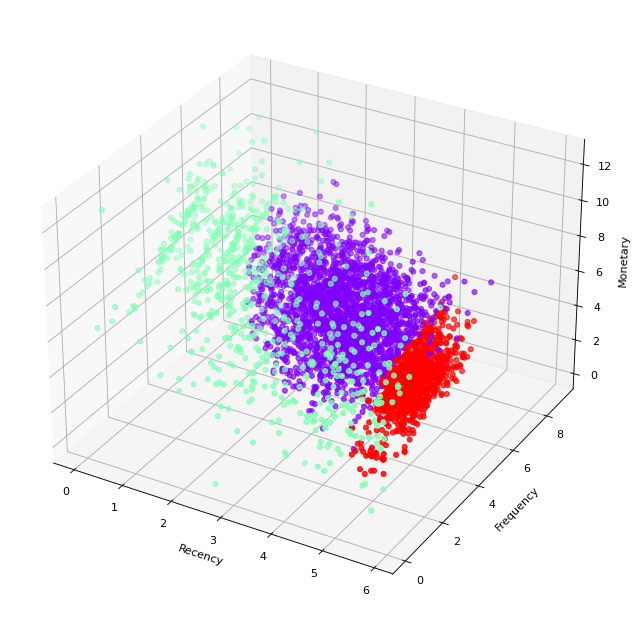

In [175]:
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42 )
gmm.fit(X_train)
gmmlabels = gmm.predict(X_train)

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(dt['Recency'],dt['Frequency'],dt['Monetary'],
             c=gmmlabels, cmap='rainbow')

xLabel = ax.set_xlabel('Recency', linespacing=3.2)
yLabel = ax.set_ylabel('Frequency', linespacing=3.1)
zLabel = ax.set_zlabel('Monetary', linespacing=3.4)




print(gmm.means_)
print('\n')
print(gmm.covariances_)

In [180]:
Dt_gmm = Dtrfm.assign(Cluster=gmmlabels) # back apply
grouped_gmm = Dt_gmm.groupby(['Cluster']).mean().round(1)
grouped_gmm

,Recency,Frequency,Monetary
Cluster,,,
0,51.7,96.8,1371.6
1,35.0,142.2,5230.7
2,252.3,27.8,350.5


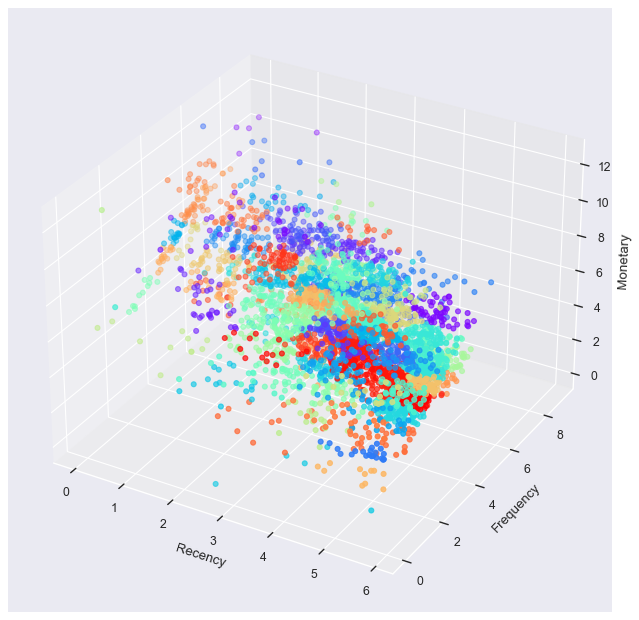

In [177]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import AffinityPropagation
from sklearn.metrics.pairwise import euclidean_distances
preference=euclidean_distances(cluster_scaled, cluster_scaled).max()
af = AffinityPropagation()
clustering = af.fit(cluster_scaled)
af.get_params()
aflabels = af.predict(cluster_scaled)

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(dt['Recency'],dt['Frequency'],dt['Monetary'],
             c=aflabels, cmap='rainbow')

xLabel = ax.set_xlabel('Recency', linespacing=3.2)
yLabel = ax.set_ylabel('Frequency', linespacing=3.1)
zLabel = ax.set_zlabel('Monetary', linespacing=3.4)



In [181]:
Dt_af = Dtrfm.assign(Cluster=aflabels) # back apply
grouped_af = Dt_af.groupby(['Cluster']).mean().round(1)
grouped_af

,Recency,Frequency,Monetary
Cluster,,,
0,1.6,4526.6,42560.1
1,195.5,112.8,1637.5
2,9.0,124.2,20642.2
3,2.5,72.8,7015.9
4,4.6,17.7,326.1
...,...,...,...
101,72.0,24.5,385.3
102,172.8,16.1,263.2
103,85.9,12.9,306.0
